In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import accuracy_score

In [ ]:
data = tf.keras.datasets.mnist
(X_train, y_train,),(X_test, y_test) = data.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

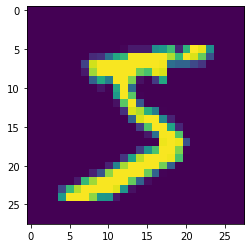

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.6684 - accuracy: 0.9063
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3310 - accuracy: 0.9377
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3182 - accuracy: 0.9413
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2863 - accuracy: 0.9436
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2435 - accuracy: 0.9493


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose= 2)

313/313 - 1s - loss: 0.3075 - accuracy: 0.9457 - 958ms/epoch - 3ms/step


In [ ]:
predictions = model.predict(X_test)

In [ ]:
model.save('handwriting_recognition')

INFO:tensorflow:Assets written to: handwriting_recognition/assets


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[i])

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

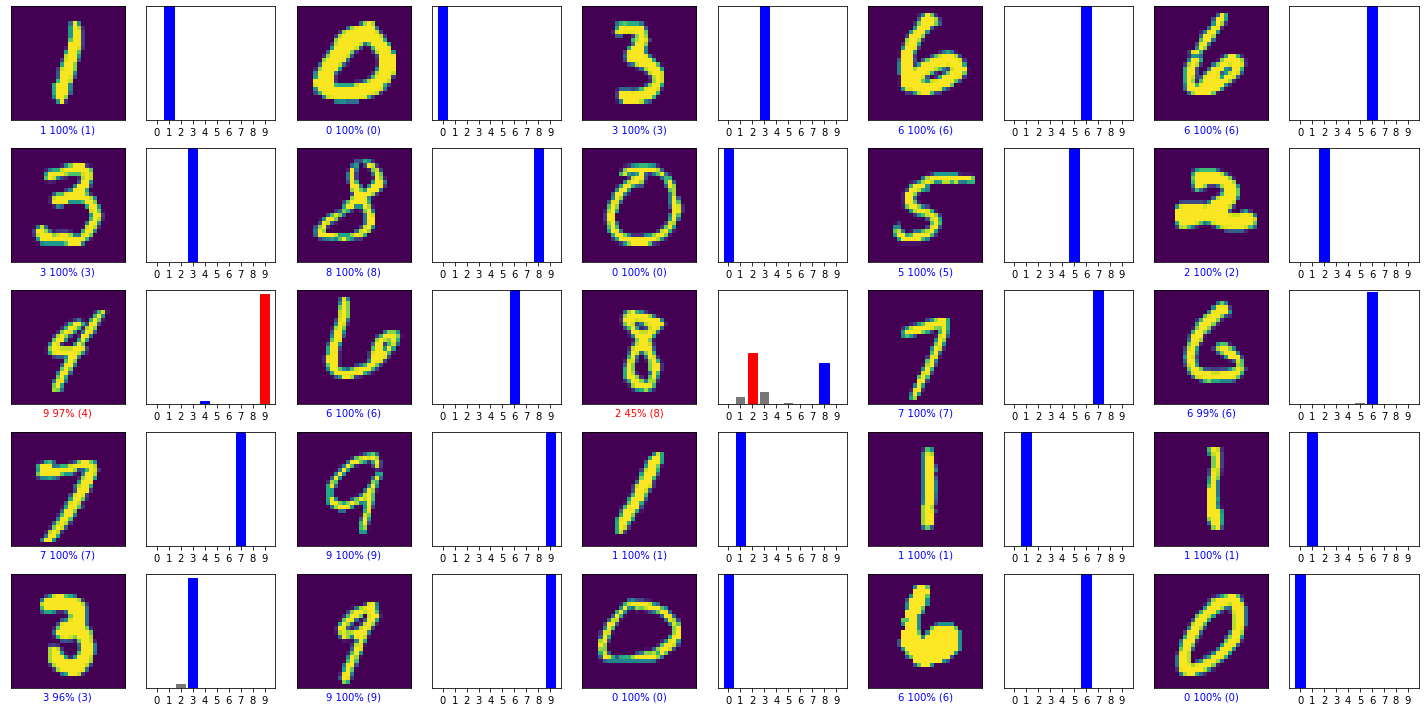

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = random.randint(0, 10000)
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()